# Interactive plots using Seaborn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

### Time series plot with error bands

* Functional magentic resonance imaging (fMRI)
* Measures brain activity using a strong, static magnetic field to detect changes associated with blood flow
* High-amplitude signals indicate strong neural activity

In [2]:
# Load data
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


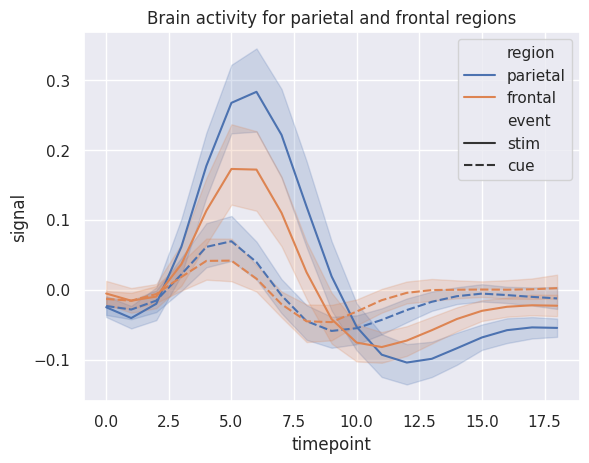

In [3]:
# Plot the responses
sns.set_theme(style="darkgrid")
sns.lineplot(x="timepoint",
             y="signal",
             hue="region",
             style="event",
             data=fmri)
plt.title("Brain activity for parietal and frontal regions")
plt.show()

### Scatterplot with continuous hues and sizes

In [5]:
# Load data
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


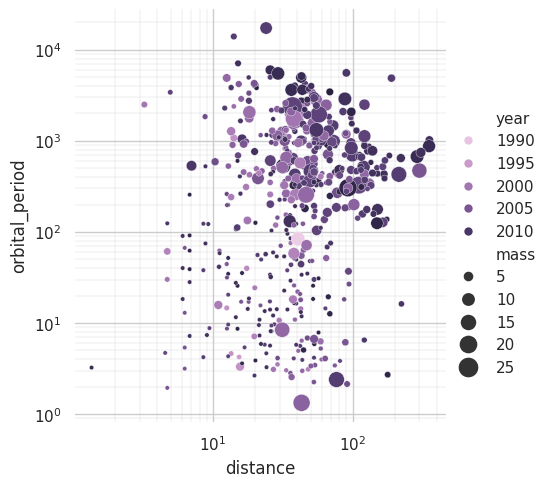

In [7]:
# Plot distance against orbital_period
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=0.2,
                             as_cmap=True)
g = sns.relplot(data=planets,
                x="distance",
                y="orbital_period",
                hue="year",
                size="mass",
                palette=cmap,
                sizes=(10, 200))
g.set(xscale="log",     
      yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=0.25)
g.ax.yaxis.grid(True, "minor", linewidth=0.25)
g.despine(left=True, bottom=True)
plt.show()

### Small multiple time series

In [8]:
# Load data
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


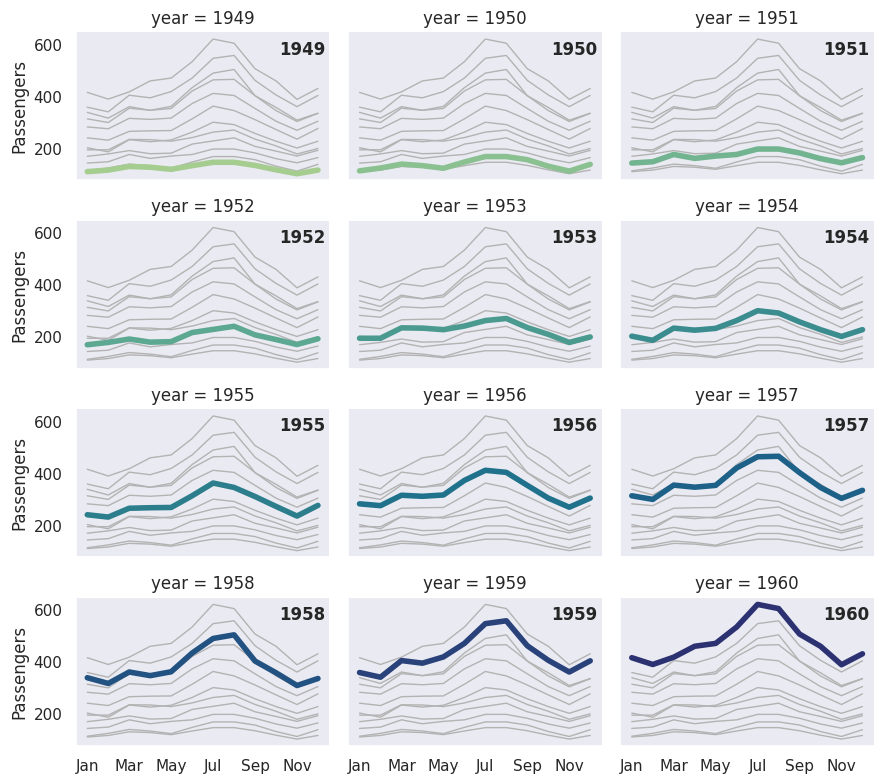

In [21]:
# Plot each year's time series in its own facet
sns.set_theme(style="dark")
g = sns.relplot(data=flights,
                x="month",
                y="passengers",
                col="year",
                hue="year",
                kind="line",
                palette="crest",
                linewidth=4,
                zorder=5,
                col_wrap=3,
                height=2,
                aspect=1.5,
                legend=False)

# Customize each subplot
for year, ax in g.axes_dict.items():
    
    # Add chart titles
    ax.text(x=0.8,
            y=0.85,
            s=year,
            transform=ax.transAxes,
            fontweight="bold")
    
    # Plot each year's timeseries
    sns.lineplot(
        data=flights,
        x="month",
        y="passengers",
        units="year",
        estimator=None,
        color="0.7",
        linewidth=1,
        ax=ax
    )

# Customise each plot
ax.set_xticks(ax.get_xticks()[::2])
g.set_axis_labels("", "Passengers")
g.tight_layout()
plt.show()

### Horizontal boxplot with observations

/tmp/ipykernel_1431/2538210291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="distance",


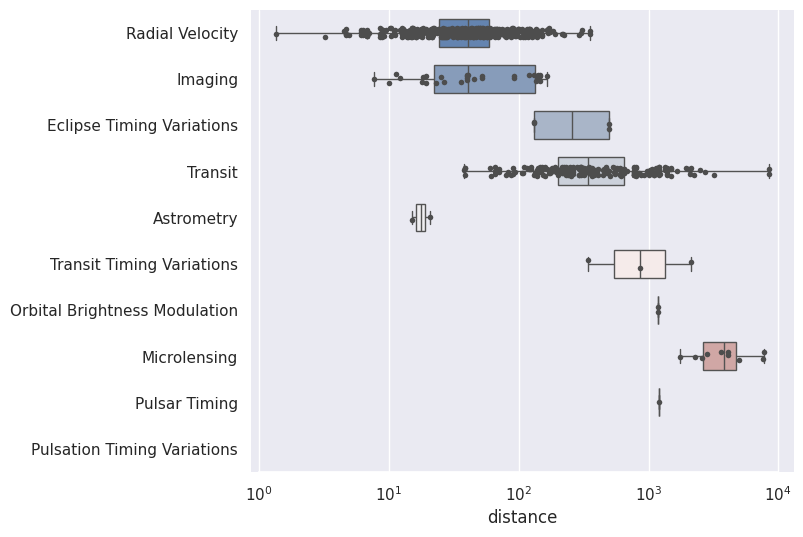

In [27]:
# Use logarithmic x-axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Plot orbital_period with horizontal boxes
sns.boxplot(x="distance",
            y="method",
            data=planets,
            whis=[0, 100],
            width=0.6,
            palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance",
              y="method",
              data=planets,
              size=4,
              color="0.3",
              linewidth=0)

# Customize chart
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True,
            left=True)